# Acquiring and exploring our own EEG data using a Bitbrain 16-channel headset

**Authors**:

 - Javi Rameerez javi@rameerez.com | [@rameerez [tw]](http://twitter.com/rameerez)

---


_This code is Open Source, released under a GPL License._

We will be using a 16-ch, wet [Bitbrain](https://bitbrain.com) EEG headset like this one:

<img src="assets/bitbrain-eeg-headset.jpg" alt="Bitbrain's EEG headset" style="width: 1024px;"/>


## Electrode placement

<img src="assets/eeg-10-20-location.png" alt="International EEG 10-20 system" style="width: 300px;"/>

**TODO**: this explanation is incomplete! Detail the location of each electrode and correspondance with channels

Basically, we've used 8 electrodes in C1 through C4 and FC1 through FC4, the next 4 in the frontal cortex and the next 4 in TODO.

Reference is Cz and ground is A1.

## Methodology

### Sampling methodology & EEG data structure

Our headset makes about 256 measurements per second and per channel (we need to actually verify this with the manufacturer).

The stored EEG dataset looks like this:

| timestamp   | sequence | battery | flags | EEG-ch1         | EEG-ch2 | ... | EEG-ch16         |
|-------------|----------|---------|-------|-----------------|---------|-----|------------------|
| 11333317601 | 24377    | -2      | 0     | 14440.732098739 | ...     | ... | -1316.9463302375 |
| ...         | ...      | ...     | ...   | ...             | ...     | ... | ...              |
| 11333350144 | 24378    | -2      | 0     | ...             | ...     | ... | ...              |


The EEG data contains rows, each row corresponds to one measurement and is identified with a `timestamp`. The first 8 measurements share the same `timestamp`, the next 8 measurements share another (non consecutive) timestamp, and so on.

What a `timestamp` is remains unknown for the moment (it is not milliseconds nor seconds since Jan 1, 1970 -- it's not a UNIX timestamp as far as we know). But we know that approximately every second, the system stores 256 measurements (belonging to 32 different timestamps).

### Labelling tasks

We asked the subject to sit down and remain calm. Then, the labelling task starts. For 10 seconds, the subject needs to think about moving the left hand. Then, for another 10 seconds, the subject needs to thing about moving the right hand. Finally, for 10 seconds, the subject rests.

## Data exploration

In [1]:
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv("data/3-thinking-about-moving-hands-2-BBT-E16-AAA005-2019-11-08_18-45-48/EEG.csv")

In [3]:
df

timestamp  sequence  battery  flags       EEG-ch1       EEG-ch2  \
0      11333317601     24377       -2      0  26244.797302  14440.732099   
1      11333317601     24377       -2      0  26243.252005  14437.422485   
2      11333317601     24377       -2      0  26238.092901  14432.640580   
3      11333317601     24377       -2      0  26233.603021  14429.257961   
4      11333317601     24377       -2      0  26235.939219  14427.140781   
5      11333317601     24377       -2      0  26233.554350  14428.089862   
6      11333317601     24377       -2      0  26230.159563  14427.639657   
7      11333317601     24377       -2      0  26233.237990  14428.102029   
8      11333350144     24378       -2      0  26234.053226  14427.250291   
9      11333350144     24378       -2      0  26231.656190  14428.430557   
10     11333350144     24378       -2      0  26233.542183  14426.605403   
11     11333350144     24378       -2      0  26227.580011  14423.417466   
12     11333350144     24378       -2      0  26222.335734  14420.983927   
13     11333350144     24378       -2      0  26222.457411  14416.287196   
14     11333350144     24378       -2      0  26222.591255  14416.396705   
15     11333350144     24378       -2      0  26217.736344  14416.749568   
16     11333381387     24379       -2      0  26220.145548  14417.990673   
17     11333381387     24379       -2      0  26223.856696  14418.246195   
18     11333381387     24379       -2      0  26221.715181  14418.708567   
19     11333381387     24379       -2      0  26224.732770  14418.684232   
20     11333381387     24379       -2      0  26227.202813  14416.554885   
21     11333381387     24379       -2      0  26222.871112  14418.672064   
22     11333381387     24379       -2      0  26222.287063  14420.034846   
23     11333381387     24379       -2      0  26226.010378  14420.886585   
24     11333417604     24380       -2      0  26224.501584  14422.565727   
25     11333417604     24380       -2      0  26223.893199  14422.833417   
26     11333417604     24380       -2      0  26227.993713  14422.809081   
27     11333417604     24380       -2      0  26228.139725  14426.118695   
28     11333417604     24380       -2      0  26233.736866  14429.026774   
29     11333417604     24380       -2      0  26238.895969  14430.146203   
...            ...       ...      ...    ...           ...           ...   
12514  11382192960     25941        4      0  26152.420148  13864.737667   
12515  11382192960     25941        4      0  26154.147961  13864.080611   
12516  11382192960     25941        4      0  26157.579251  13864.749834   
12517  11382192960     25941        4      0  26154.938861  13867.925603   
12518  11382192960     25941        4      0  26157.822605  13866.100449   
12519  11382192960     25941        4      0  26156.447655  13861.634904   
12520  11382225441     25942        4      0  26148.429143  13857.522222   
12521  11382225441     25942        4      0  26144.267791  13853.750236   
12522  11382225441     25942        4      0  26142.722493  13852.350951   
12523  11382225441     25942        4      0  26138.086601  13849.661890   
12524  11382225441     25942        4      0  26135.957254  13848.749313   
12525  11382225441     25942        4      0  26134.849994  13844.721805   
12526  11382225441     25942        4      0  26130.165430  13842.641129   
12527  11382225441     25942        4      0  26130.627803  13846.741643   
12528  11382258165     25943        4      0  26133.329032  13845.378861   
12529  11382258165     25943        4      0  26134.205106  13846.084587   
12530  11382258165     25943        4      0  26136.370956  13849.515878   
12531  11382258165     25943        4      0  26138.050098  13847.459537   
12532  11382258165     25943        4      0  26133.511547  13846.997165   
12533  11382258165     25943        4      0  26131.808069  13847.277022   
12534  11382258165     25943        4      0  26138.51247

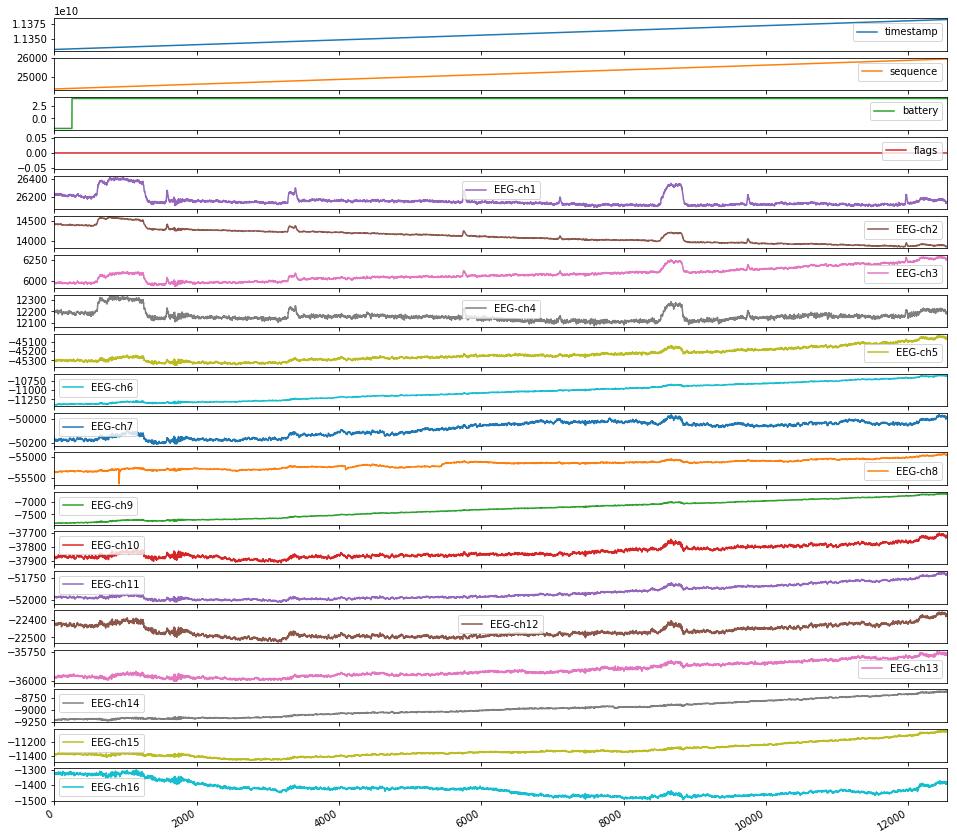

In [7]:
df.plot(subplots=True, figsize=(16, 16));

## Data labelling

For dataset #3, we know that we started the labelling task at `starting_seconds`.

Each second contains many `samples_per_second`.

The first measurement of the labelling task is then `starting_sample`.

Each labelling task lasts for `seconds_per_training_label`.

This way we can know the measurement corresponding to the start and end of every labelling task.

In [9]:
starting_seconds = 12.52
samples_per_second = 256

starting_sample = int(starting_seconds * samples_per_second)

seconds_per_training_label = 10
samples_per_training_label = seconds_per_training_label * samples_per_second

first_label_start = starting_sample
second_label_start = starting_sample + samples_per_training_label
third_label_start = second_label_start + samples_per_training_label
third_label_end = third_label_start + samples_per_training_label

In [10]:
for i, row in df.iterrows():
    if first_label_start <= i <= second_label_start:
        df.at[i, 'label'] = "left"
        df.at[i, 'label_code'] = 1
    elif second_label_start <= i <= third_label_start:
        df.at[i, 'label'] = "right"
        df.at[i, 'label_code'] = 2
    elif third_label_start <= i <= third_label_end:
        df.at[i, 'label'] = "rest"
        df.at[i, 'label_code'] = 0
    else:
        df.at[i, 'label'] = "none"
        df.at[i, 'label_code'] = -1

In [11]:
df["label_code"] = df["label_code"].astype(int)

In [12]:
df.to_pickle("data/3-thinking-about-moving-hands-2-BBT-E16-AAA005-2019-11-08_18-45-48/labelled-eeg.pkl")

## Exploring the EEG by label

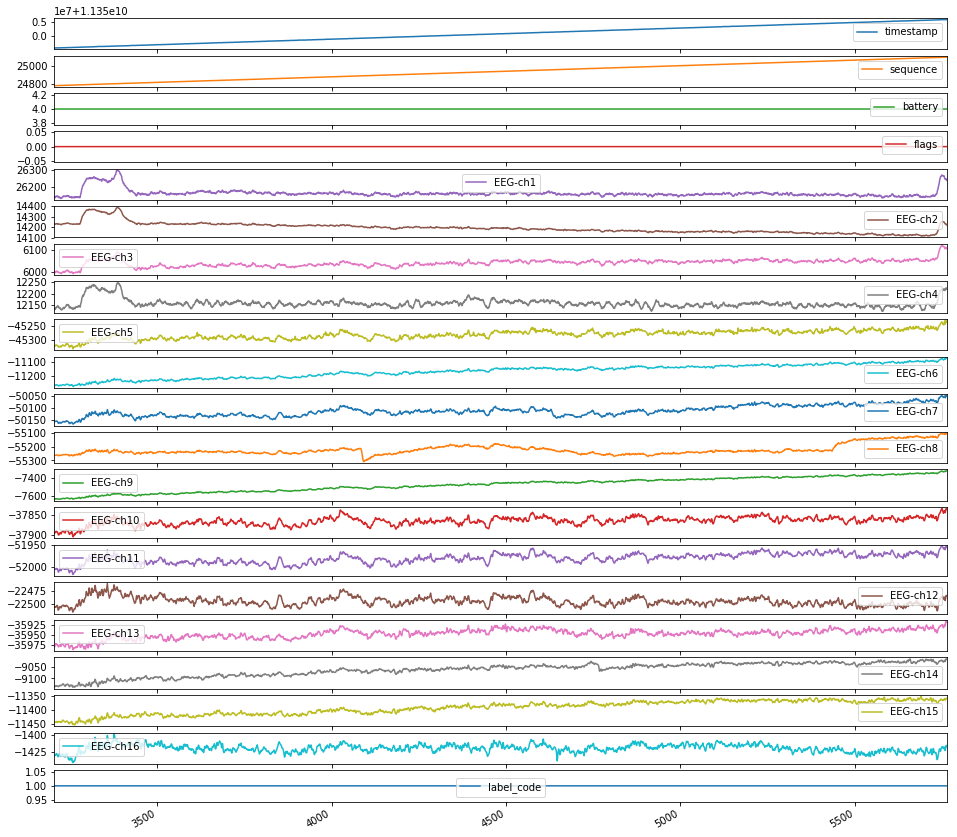

In [13]:
df.loc[df['label'] == "left"].plot(subplots=True, figsize=(16, 16));

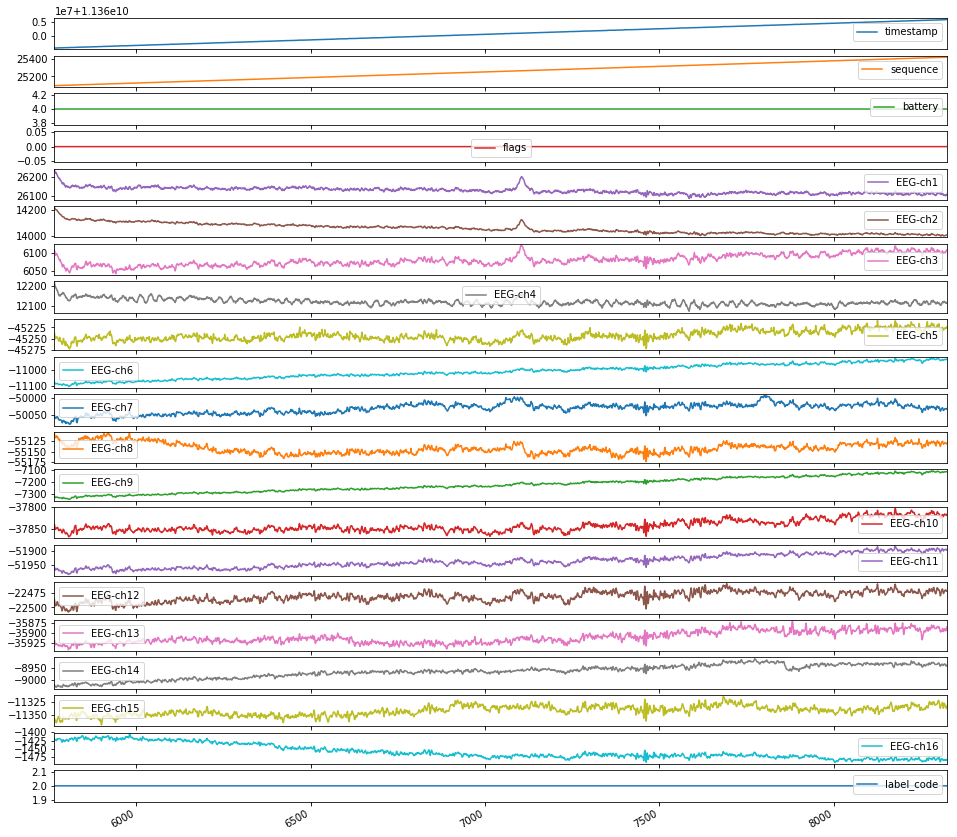

In [14]:
df.loc[df['label'] == "right"].plot(subplots=True, figsize=(16, 16));

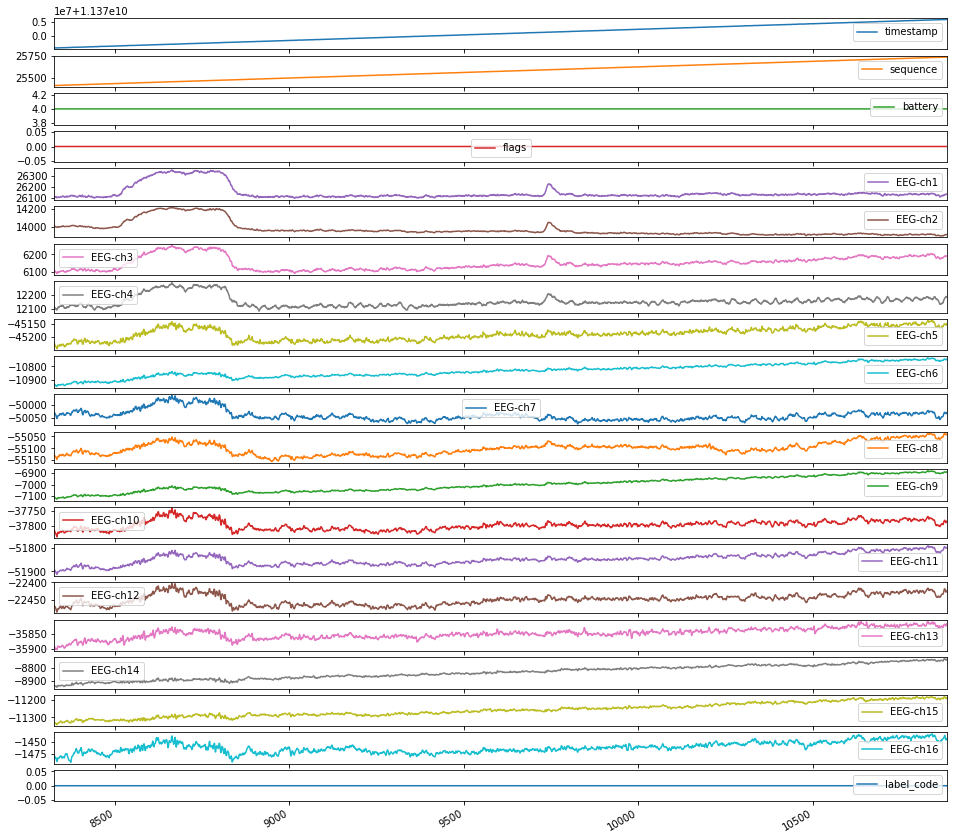

In [15]:
df.loc[df['label'] == "rest"].plot(subplots=True, figsize=(16, 16));